# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [110]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from datetime import date


from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

today = date.today()
today

datetime.date(2020, 7, 29)

## Generate Cities List

In [111]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


# Print the city count to confirm sufficient count

len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [112]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build partial query URL

#city = 'Avarua'
units = 'Imperial'
query_url = f"{url}appid={weather_api_key}&units={units}&q="
# print(query_url)
# Test and view the json response to access various data elements
# response = requests.get(query_url + city).json()
# print(response)
# print(json.dumps(response, indent=4))

In [113]:
# Setup a loop to loop through each city in cities and get the relevant weather info + lat and longtitude info
# since all lats and lngs didn't retrieve a city (lists for cities and weather are of a different lengths) so we must handle that via a 
# try/except condition AND build a cities list with only those cities where weather data was successfully retrieved.
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
city_name = []
city_lats = []
city_lngs = []
city_datetime = []
city_country = []


counter = 0
for city in cities:
    
    response = requests.get(query_url + city).json()

    try:
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        city_name.append(response['name'])
        city_datetime.append(response['dt'])
        city_country.append(response['sys']['country'])
        city_lats.append(response['coord']['lat'])
        city_lngs.append(response['coord']['lon'])
        
        counter = counter + 1
        print(f"#: {counter}: Retrieving weather data for {city}, city ID:{response['id']}")
    except:    
        print(f"Weather data for {city} not found, skipping.")
        pass
    

#: 1: Retrieving weather data for iberia, city ID:4328254
#: 2: Retrieving weather data for busselton, city ID:2075265
#: 3: Retrieving weather data for mudgee, city ID:2156404
#: 4: Retrieving weather data for ushuaia, city ID:3833367
#: 5: Retrieving weather data for saint-philippe, city ID:935215
#: 6: Retrieving weather data for cap malheureux, city ID:934649
#: 7: Retrieving weather data for qaanaaq, city ID:3831208
#: 8: Retrieving weather data for turukhansk, city ID:1488903
DATA FOR tabiauea NOT FOUND IN THE WEATHER API
#: 9: Retrieving weather data for barrow, city ID:5880054
#: 10: Retrieving weather data for east london, city ID:1006984
#: 11: Retrieving weather data for norman wells, city ID:6089245
#: 12: Retrieving weather data for saldanha, city ID:3361934
#: 13: Retrieving weather data for burnie, city ID:2173125
#: 14: Retrieving weather data for punta arenas, city ID:3874787
#: 15: Retrieving weather data for labuhan, city ID:8079926
#: 16: Retrieving weather data for

#: 126: Retrieving weather data for thompson, city ID:6165406
#: 127: Retrieving weather data for chokurdakh, city ID:2126123
DATA FOR tumannyy NOT FOUND IN THE WEATHER API
#: 128: Retrieving weather data for quelimane, city ID:1028434
#: 129: Retrieving weather data for aykhal, city ID:2027296
#: 130: Retrieving weather data for pawayan, city ID:1260003
#: 131: Retrieving weather data for mount isa, city ID:2065594
#: 132: Retrieving weather data for goma, city ID:216281
DATA FOR barentsburg NOT FOUND IN THE WEATHER API
#: 133: Retrieving weather data for paamiut, city ID:3421193
#: 134: Retrieving weather data for barcelona, city ID:3128760
#: 135: Retrieving weather data for khani, city ID:610864
#: 136: Retrieving weather data for issenye, city ID:158974
#: 137: Retrieving weather data for khatanga, city ID:2022572
#: 138: Retrieving weather data for la rioja, city ID:3336897
#: 139: Retrieving weather data for sorland, city ID:3137469
#: 140: Retrieving weather data for richards b

#: 251: Retrieving weather data for aksarka, city ID:1512019
#: 252: Retrieving weather data for pitimbu, city ID:3391889
#: 253: Retrieving weather data for madang, city ID:2091996
#: 254: Retrieving weather data for kismayo, city ID:55671
#: 255: Retrieving weather data for chinchina, city ID:3686561
#: 256: Retrieving weather data for haines junction, city ID:5969025
#: 257: Retrieving weather data for tual, city ID:1623197
#: 258: Retrieving weather data for carbonia, city ID:2525362
#: 259: Retrieving weather data for guerrero negro, city ID:4021858
#: 260: Retrieving weather data for tasiilaq, city ID:3424607
#: 261: Retrieving weather data for srinivaspur, city ID:1255631
#: 262: Retrieving weather data for dawlatabad, city ID:1142226
#: 263: Retrieving weather data for touros, city ID:3386213
DATA FOR tsihombe NOT FOUND IN THE WEATHER API
#: 264: Retrieving weather data for nouadhibou, city ID:2377457
#: 265: Retrieving weather data for trairi, city ID:3386177
#: 266: Retrievin

#: 373: Retrieving weather data for heze, city ID:1808198
#: 374: Retrieving weather data for moerai, city ID:4034188
#: 375: Retrieving weather data for borogontsy, city ID:2026160
#: 376: Retrieving weather data for iqaluit, city ID:5983720
#: 377: Retrieving weather data for hambantota, city ID:1244926
#: 378: Retrieving weather data for fortuna, city ID:5563839
#: 379: Retrieving weather data for libertador general san martin, city ID:3846915
#: 380: Retrieving weather data for port hedland, city ID:2063042
#: 381: Retrieving weather data for bilma, city ID:2446796
#: 382: Retrieving weather data for linxia, city ID:1803331
#: 383: Retrieving weather data for praya, city ID:3374333
#: 384: Retrieving weather data for banda aceh, city ID:1215502
#: 385: Retrieving weather data for darhan, city ID:2031964
#: 386: Retrieving weather data for san francisco, city ID:5391959
#: 387: Retrieving weather data for elko, city ID:5703673
DATA FOR kawana waters NOT FOUND IN THE WEATHER API
#: 3

#: 496: Retrieving weather data for kemin, city ID:1528606
#: 497: Retrieving weather data for vao, city ID:2137773
#: 498: Retrieving weather data for fort walton beach, city ID:4156042
#: 499: Retrieving weather data for peleduy, city ID:2018069
#: 500: Retrieving weather data for pangnirtung, city ID:6096551
#: 501: Retrieving weather data for seydi, city ID:1218420
DATA FOR skalistyy NOT FOUND IN THE WEATHER API
DATA FOR dera din panah NOT FOUND IN THE WEATHER API
#: 502: Retrieving weather data for iquique, city ID:3887127
#: 503: Retrieving weather data for kitimat, city ID:5993072
DATA FOR warqla NOT FOUND IN THE WEATHER API
#: 504: Retrieving weather data for sertania, city ID:3387663
#: 505: Retrieving weather data for launceston, city ID:2160517
#: 506: Retrieving weather data for san jeronimo, city ID:3929611
#: 507: Retrieving weather data for road town, city ID:3577430
#: 508: Retrieving weather data for bud, city ID:4255151
#: 509: Retrieving weather data for linqiong, ci

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [114]:
# Create a dictionary of the lists to combine all the collected data into a single dataframe.
cities_dict ={
    "City": city_name,
    "Latitude": city_lats,
    "Longtitude": city_lngs,
    "Max Temperature": max_temp,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Wind Speed" : wind_speed,
    "Time of Data": city_datetime,
    "Country Code" : city_country
}
# Create the initial dataframe from the above dictionary.
cities_df = pd.DataFrame(cities_dict)
cities_df.head()

,City,Latitude,Longtitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Time of Data,Country Code
0,Iberia,29.95,-91.75,89.60,70,20,12.75,1596059127,US
1,Busselton,-33.65,115.33,46.99,92,79,5.19,1596059127,AU
2,Mudgee,-32.59,149.59,36.00,93,0,3.36,1596059127,AU
3,Ushuaia,-54.80,-68.30,39.20,92,75,28.86,1596059083,AR
4,Saint-Philippe,-21.36,55.77,66.20,88,8,4.70,1596059128,RE


In [115]:
cities_df.to_csv("../Resources/cities_weather_data.csv", encoding="utf-8", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [116]:
#  Get the indices of cities that have humidity over 100%. if there are then filter them out.
filt=(cities_df['Humidity'] > 100)

if cities_df['Humidity'].max() > 100:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# ~ returns the inverse of the filter condition.
    clean_city_data = cities_df[~filt]
else:
    clean_city_data = cities_df

clean_city_data.shape
    

(566, 9)

In [117]:
# Export the City_Data into a csv
clean_city_data.to_csv("../Resources/clean_city_weather_data.csv", encoding="utf-8", index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

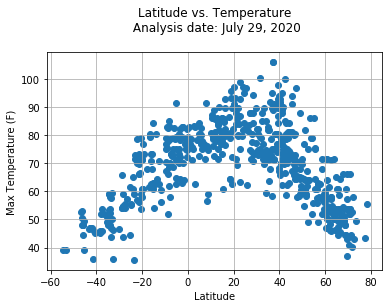

In [124]:
analysis_date = today.strftime("%B %d, %Y")
plt.scatter(clean_city_data['Latitude'],clean_city_data['Max Temperature'])

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"Latitude vs. Temperature\n Analysis date: {analysis_date}\n")
plt.grid(True)

# Save the plot to the png folder
plt.savefig("../plots/latitude_vs_temp.png")
#plt.savefig("latitude_vs_temp.png")

# Show the plot
plt.show()


> The Latitude vs Temperature plot shows an increase in temperature for cities closer to the equator and more <br>
> specifically cities that fall between 20 and 40 degrees north of the equator have the highest temperaures.

## Latitude vs. Humidity Plot

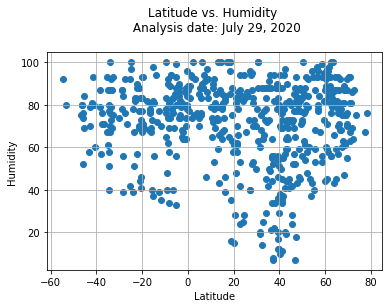

In [125]:
analysis_date = today.strftime("%B %d, %Y")
plt.scatter(clean_city_data['Latitude'],clean_city_data['Humidity'])

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f"Latitude vs. Humidity \n Analysis date: {analysis_date}\n")
plt.grid(True)

# Save the plot to the png folder
plt.savefig("../plots/latitude_vs_humidity.png")

# Show the plot
plt.show()

> The Latitude vs Humidity plot shows a broad range of humidity values (from low to high) across all latitudes, with <br>
> a higher concentration of greater humidity vs lower humidity.

## Latitude vs. Cloudiness Plot

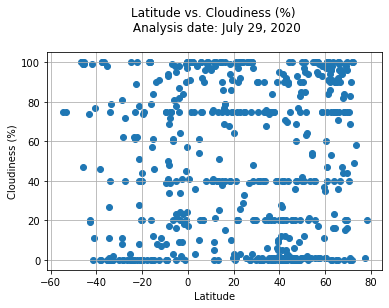

In [126]:
analysis_date = today.strftime("%B %d, %Y")
plt.scatter(clean_city_data['Latitude'],clean_city_data['Cloudiness'])

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"Latitude vs. Cloudiness (%) \n Analysis date: {analysis_date}\n")
plt.grid(True)

# Save the plot to the png folder
plt.savefig("../plots/latitude_vs_cloudiness.png")

# Show the plot
plt.show()

> The Latitude vs Cloudiness plot shows a broad variation of cloudiness across all latitudes with concentrations of 100% and 0% > cloudiness across latitudes spanning from -40 to 70.

## Latitude vs. Wind Speed Plot

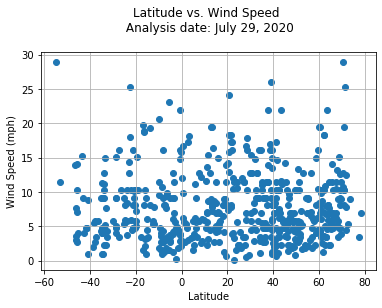

In [127]:
analysis_date = today.strftime("%B %d, %Y")
plt.scatter(clean_city_data['Latitude'],clean_city_data['Wind Speed'])

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"Latitude vs. Wind Speed \n Analysis date: {analysis_date}\n")
plt.grid(True)

# Save the plot to the png folder
plt.savefig("../plots/latitude_vs_wind_speed.png")

# Show the plot
plt.show()

> The Latitude vs Wind Speed plot shows a high concentration of cities with low wind speeds (under 10 Mph) across the <br>
> range of latitudes from -45 to 80.

## Linear Regression

In [128]:
# OPTIONAL: Create a function to create Linear Regression plots

In [129]:
# Create Northern and Southern Hemisphere DataFrames
northern_filt = (clean_city_data['Latitude'] >= 0)
northern_df = clean_city_data[northern_filt]
print(northern_df.shape)
southern_filt = (clean_city_data['Latitude'] < 0)
southern_df = clean_city_data[southern_filt]
print(southern_df.shape)

(396, 9)
(170, 9)


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4570721452971806


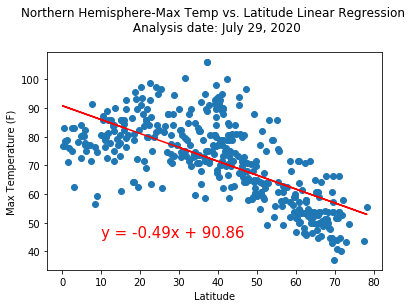

In [130]:
# Setup data and labels for the plot
x_values = northern_df['Latitude']
y_values = northern_df['Max Temperature']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"Northern Hemisphere-Max Temp vs. Latitude Linear Regression \n Analysis date: {analysis_date}\n")

# Linear regression calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,45),fontsize=15,color="red")

# Print the linear regression r-squared value
print(f"The r-squared is: {rvalue**2}")

# Save the plot to the png folder
plt.savefig("../plots/northern_max_temp_vs_lat_linear_regression.png")

# Show the plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6564605302833701


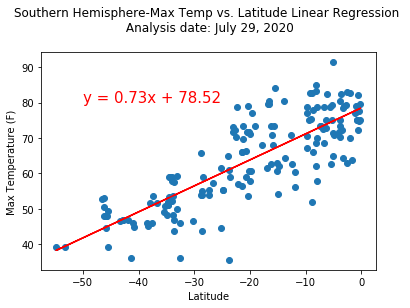

In [131]:
# Setup data and labels for the plot
x_values = southern_df['Latitude']
y_values = southern_df['Max Temperature']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"Southern Hemisphere-Max Temp vs. Latitude Linear Regression \n Analysis date: {analysis_date}\n")

# Linear regression calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")

# Print the linear regression r-squared value
print(f"The r-squared is: {rvalue**2}")

# Save the plot to the png folder
plt.savefig("../plots/southern_max_temp_vs_lat_linear_regression.png")

# Show the plot
plt.show()

> In the southern hemisphere there is moderate coorelation between max temperatures increasing as latitudes get closer to <br> > the equator.  In the northern hemisphere, a similar trend appears to be true however the correlation, correlation  <br>
> coefficient indicates a weak to moderate correlation.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0001410244209414988


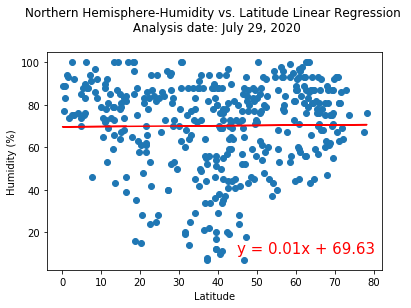

In [132]:
# Setup data and labels for the plot
x_values = northern_df['Latitude']
y_values = northern_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"Northern Hemisphere-Humidity vs. Latitude Linear Regression \n Analysis date: {analysis_date}\n")

# Linear regression calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

# Print the linear regression r-squared value
print(f"The r-squared is: {rvalue**2}")

# Save the plot to the png folder
plt.savefig("../plots/northern_humidity_vs_lat_linear_regression.png")

# Show the plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0001120564968040459


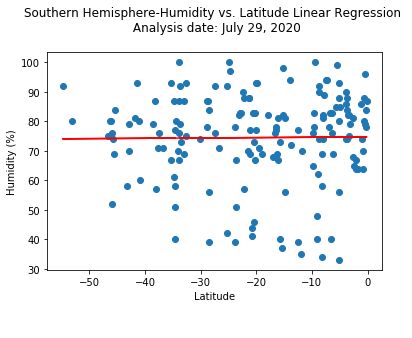

In [133]:
# Setup data and labels for the plot
x_values = southern_df['Latitude']
y_values = southern_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"Southern Hemisphere-Humidity vs. Latitude Linear Regression \n Analysis date: {analysis_date}\n")

# Linear regression calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")

# Print the linear regression r-squared value
print(f"The r-squared is: {rvalue**2}")

# Save the plot to the png folder
plt.savefig("../plots/southern_humidity_vs_lat_linear_regression.png")

# Show the plot
plt.show()

> There is no correlation between Humidity and Latitude in either the northern or southern hemispheres. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.000563326543598896


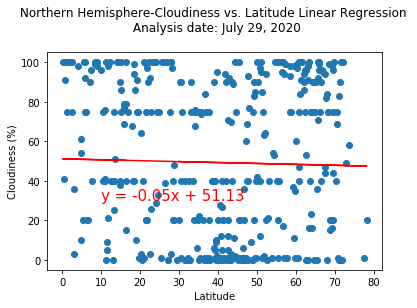

In [134]:
# Setup data and labels for the plot
x_values = northern_df['Latitude']
y_values = northern_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"Northern Hemisphere-Cloudiness vs. Latitude Linear Regression \n Analysis date: {analysis_date}\n")

# Linear regression calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")

# Print the linear regression r-squared value
print(f"The r-squared is: {rvalue**2}")

# Save the plot to the png folder
plt.savefig("../plots/northern_cloudiness_vs_lat_linear_regression.png")

# Show the plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 6.681711458272414e-07


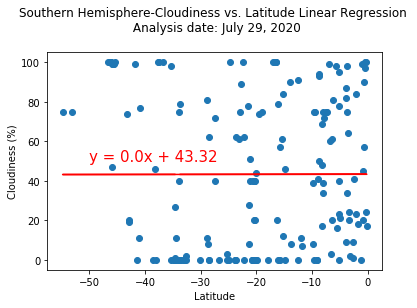

In [135]:
# Setup data and labels for the plot
x_values = southern_df['Latitude']
y_values = southern_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"Southern Hemisphere-Cloudiness vs. Latitude Linear Regression \n Analysis date: {analysis_date}\n")

# Linear regression calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")

# Print the linear regression r-squared value
print(f"The r-squared is: {rvalue**2}")

# Save the plot to the png folder
plt.savefig("../plots/southern_cloudiness_vs_lat_linear_regression.png")

# Show the plot
plt.show()

> There is no correlation between Cloudiness and Latitude in either the northern or southern hemispheres. Cloudiness <br>
> varies from 0% to 100% across the range of observed latitudes.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00010096017041350111


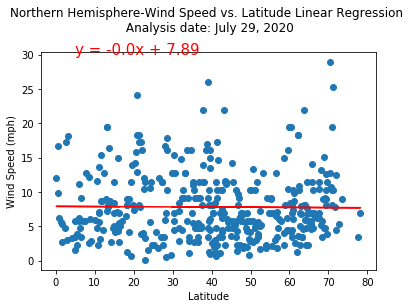

In [136]:
# Setup data and labels for the plot
x_values = northern_df['Latitude']
y_values = northern_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"Northern Hemisphere-Wind Speed vs. Latitude Linear Regression \n Analysis date: {analysis_date}\n")

# Linear regression calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,30),fontsize=15,color="red")

# Print the linear regression r-squared value
print(f"The r-squared is: {rvalue**2}")

# Save the plot to the png folder
plt.savefig("../plots/northern_windspeed_vs_lat_linear_regression.png")

# Show the plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.008117003246743299


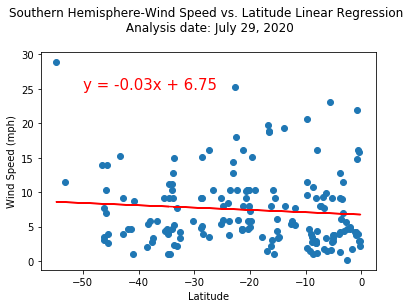

In [137]:
# Setup data and labels for the plot
x_values = southern_df['Latitude']
y_values = southern_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"Southern Hemisphere-Wind Speed vs. Latitude Linear Regression \n Analysis date: {analysis_date}\n")

# Linear regression calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")

# Print the linear regression r-squared value
print(f"The r-squared is: {rvalue**2}")

# Save the plot to the png folder
plt.savefig("../plots/southern_windspeed_vs_lat_linear_regression.png")

# Show the plot
plt.show()

> There is no correlation between Wind Speed and Latitude in either the northern or southern hemispheres.<br>
> There are a higher number of cities with low Wind speeds across the range of latitudes in the northern hemisphere  <br> 
> ranging from the equator to 70 degrees north.  In the southern hemisphere, there are fewer data points, <br> 
> (than in the northern hemisphere) however there is a similar concentration of lower wind speeds (10mph) from <br>
> the equator to approximately -46 south.